# Data Analysis - Final Project

In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1: Which teams have won the world series the most?

In [4]:
#read the data and construct a table that has statistics for currently active franchises only
teamData = pd.read_csv('BaseballTeamStats.csv')
franchiseData = pd.read_csv('BaseballTeamFranchises.csv')
mergedTeamData = teamData.merge(franchiseData,on='franchID',how='inner')
currentTeamData = mergedTeamData[mergedTeamData['active']=='Y']

Text(0,0.5,'Number of Wins')

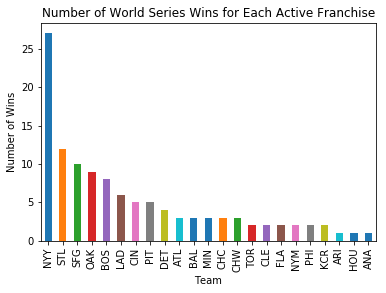

In [5]:
#find the numbers of world series wins for each team and create a bar chart
ws_winner_stats = currentTeamData[currentTeamData['WSWin'] == 'Y'] #data frame with only world series winners
count_by_team = ws_winner_stats.groupby('franchID')['yearID'].count().sort_values(ascending=False)
bar_chart_of_winners = count_by_team.plot(kind='bar',title='Number of World Series Wins for Each Active Franchise')
bar_chart_of_winners.set_xlabel('Team')
bar_chart_of_winners.set_ylabel('Number of Wins')

We can see from the previous plot that the New York Yankees have won the World Series the most with 27 total wins. The St. Louis Cardinals rank second with 12 total wins. Of the current active franchises, there are 7 that have not yet won a World Series.

### Question 2: What percent of the time does the team with the best in-season record win the World Series? 

In [6]:
#find the teams with the best winning percentage and see what percent went on to win the World Series
currentTeamData = currentTeamData.assign(WP=pd.Series(currentTeamData['W']/currentTeamData['G'])) #create winning percentage column
bestRecordTeams = currentTeamData.loc[list(currentTeamData.groupby('yearID')['WP'].idxmax())] #list of teams with best records by season
len(bestRecordTeams[bestRecordTeams['WSWin'] == 'Y'])/len(bestRecordTeams)


0.31690140845070425

We can see from the above cell that the team with the best regular-season winning percentage has gone on to win the World Series 31.69% of the time. This number is somewhat misleading, though, as prior to 1969, there was only one round of playoffs between the winners of the two leagues. With the World Series always featuring the team with the best record, there was a greater chance of that team winning. Now that the playoffs include more rounds, it is harder for the team with the best winning percentage to reach the World Series, let alone win it.

### Question 3: Which is a better perdictor of total number of wins for a team, home runs by the offense or strikeouts by the pitching staff?

Correlation between Home Runs and Wins 0.363475556868082
Correlation between Strikeouts by Pitchers and Wins 0.2841829539623063


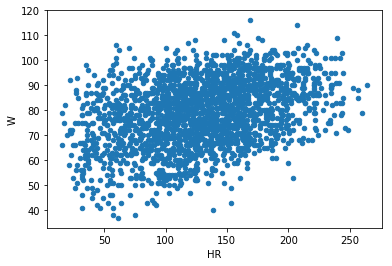

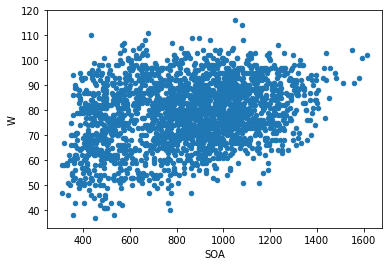

In [7]:
#make two scatterplots of liveball era data and measure the correlation on each pair of variables
liveBallEra = currentTeamData[currentTeamData['yearID']>=1920]
liveBallEra.plot.scatter('HR','W')
print('Correlation between Home Runs and Wins', liveBallEra['HR'].corr(liveBallEra['W']))
liveBallEra.plot.scatter('SOA','W')
print('Correlation between Strikeouts by Pitchers and Wins', liveBallEra['SOA'].corr(liveBallEra['W']))

We can see that both home runs by the offense and strikeouts by the defense have a positive correlation with wins, though neither is incredibly strong. Home runs seem to have a slightly stronger correlation, although interestingly, the trend is reversed if only games from 2010 and onward are considered. Perhaps the advent of the defensive shift has been a factor?

### Question 4: Which variables have the strongest and weakest correlations with wins if we only consider games played since the year 2000?

In [49]:
teamData_2000s = currentTeamData[currentTeamData['yearID']>=2000]
(teamData_2000s.corr()['W']**2).sort_values(ascending=False)

W             1.000000
WP            0.999813
L             0.999230
Rank          0.788414
SV            0.407580
RA            0.405340
ERA           0.401997
ER            0.387372
HA            0.286976
R             0.272256
attendance    0.227355
IPouts        0.219094
SHO           0.217271
BBA           0.198519
BB            0.167861
HR            0.143414
FP            0.133823
HRA           0.133726
E             0.126218
H             0.114260
SOA           0.107066
SF            0.084151
2B            0.060939
DP            0.034646
CG            0.028995
AB            0.026687
HBP           0.025721
CS            0.016210
SO            0.015861
Ghome         0.009212
BPF           0.007342
3B            0.007316
G             0.006364
PPF           0.002337
SB            0.001412
yearID        0.000003
Name: W, dtype: float64

We can see that pitching variables tend to have a stronger r^2 values with saves, runs against, era, and hits against leading the way. Hitting statistics like runs, home runs, and walks are slight weaker. Surprisingly, home attendance is a stronger predictor than all offensive statistics besides runs, though winning teams usually have better attendance, so the relationship is probably not causal. At the bottom of the list, we can see that stolen bases, home park factors, triples, and strike outs are all weakly correlated with wins. 

### Question #5: Which active franchise has the best winning percentage?

In [21]:
(currentTeamData.groupby('franchID')['W'].sum()/currentTeamData.groupby('franchID')['G'].sum()).sort_values(ascending=False)

franchID
NYY    0.563753
SFG    0.532537
LAD    0.523081
STL    0.516174
BOS    0.515080
CHC    0.509191
CLE    0.508342
DET    0.504479
CIN    0.502595
PIT    0.500650
CHW    0.500574
ANA    0.500384
TOR    0.497393
ATL    0.496082
ARI    0.492593
HOU    0.490724
WSN    0.487061
KCR    0.485066
OAK    0.484241
NYM    0.479306
TEX    0.478887
MIL    0.477398
MIN    0.476956
BAL    0.474073
FLA    0.469731
SEA    0.469704
COL    0.469157
PHI    0.468808
TBD    0.463249
SDP    0.462119
dtype: float64

From the table above, we can see that the Yankees have the best winning percentage among all the franchises followed by the Giants, Dodgers, and Cardinals. The least winning franchise is the Padres followed by the Rays, Phillies, and Rockies. This metric of success tends to favor teams that have been in existence for a long period of time since expansion teams often have losing records in their first several years of existence. 